# Overview of Microgrant and Honoraria Process

To facilitate participation, 89 microgrants have been granted since the third cohort to participants across 23 countries from five continents. The grants range from 5 GBP to 1,020 GBP with a mean request value of 147 GBP. A large proportion of the budget is reserved for participants in LMIC countries. Requests included expenses for electronic items (Headset, Webcam, Battery, Mouse, Modem, Hard Drive, Keyboard - from the most to least requested), internet and caring responsibility costs. 

The cohorts also involved 130+ mentors, 90+ speakers, 170+ experts, and 30+ facilitators from 6 continents. Since the third cohort, 135 honoraria were provided to mentors, facilitators, and speakers for 35,700 GBP with an average of 264 GBP per honorarium.  

In [1]:
from pathlib import Path
import re

import matplotlib.pyplot as plt
import pandas as pd
import pycountry
import seaborn as sns
import geopandas

In [2]:
country_continent_fp = Path("../data/country_alpha_2_continent.csv")
country_continent_df = (
    pd.read_csv(country_continent_fp, index_col=0)
)
COUNTRY_ALPHA2_TO_CONTINENT = country_continent_df.to_dict()['Continent']

def get_continent(country):
    """
    Get continent

    :param country: name of the country
    """
    py_country = pycountry.countries.get(name=country)
    if py_country is None:
        py_country = pycountry.countries.get(common_name=country)
    if py_country is None:
        return ""
    else:
        if py_country.alpha_2 not in COUNTRY_ALPHA2_TO_CONTINENT:
            return ""
        else:
            return COUNTRY_ALPHA2_TO_CONTINENT[py_country.alpha_2]


def get_country_3(country):
    """
    Get country code

    :param country: name of the country
    """
    py_country = pycountry.countries.get(name=country)
    if py_country is None:
        py_country = pycountry.countries.get(common_name=country)
    if py_country is None:
        return ""
    else:
        return py_country.alpha_3


rate = {
    "GBP": 1,
    "USD": 0.8,
    "EUR": 0.86,
    "INR": 0.0095,
    "XAF": 0.0013,
    "ZAR": 0.042,
    "ARS": 0.0022,
    "": 1
}

## Microgrants

In [3]:
def get_item(item):
    new_item = set()
    if "internet" in item or "Internet" in item or "Data subscription" in item or "mobile data" in item:
        new_item.add("Internet")
    if "Book" in item:
        new_item.add("Book")
    if "microphone" in item or "Microphone" in item or "headset" in item or "Headset" in item or "headphones" in item or "earbuds" in item:
        new_item.add("Headset")
    if "webcam" in item or "Webcam" in item:
        new_item.add("Webcam")
    if "marketing and merchandising expenses" in item:
        new_item.add("Marketing")
    if "childcare" in item or "Childcare" in item:
        new_item.add("Caring")
    if "Mouse" in item:
        new_item.add("Mouse")
    if "modem" in item or "Router" in item:
        new_item.add("Modem")
    if "batteries" in item or "battery" in item or "Powerbank" in item:
        new_item.add("Battery")
    if "keyboard" in item or "Keyboard" in item:
        new_item.add("Keyboard")
    if "new computer" in item or "Dell Latitude" in item:
        new_item.add("Laptop")
    if "Hard disk" in item or "Memory card" in item or "hard drive" in item:
        new_item.add("Hardrive")
    if "chair" in item or "license" in item or "prototype" in item or "Gasoline" in item or "Fuel" in item or "implementation of the project" in item:
        new_item.add("Other")
    return list(new_item)

microg_df = (
    pd.read_csv(Path("../data/microgrants.csv") )
    .fillna("")
    .assign(
        Continent=lambda df: [get_continent(x) for x in df.Country],
        Rate=lambda df: [rate[x] for x in df.Currency],
        Items=lambda df: [get_item(x) for x in df.Item],
    )
    .assign(Cost= lambda df: df.Cost * df.Rate)
    .drop(columns = ["Currency", "Rate", "Item"])
)

### Costs

Aggregating statistic of microgrant costs

In [4]:
microg_df.Cost.describe()

count      89.000000
mean      146.153343
std       170.657150
min         5.600000
25%        42.740500
50%        83.260000
75%       155.790000
max      1020.000000
Name: Cost, dtype: float64

Total amount (in GBP)

In [5]:
sum(microg_df.Cost)

13007.647500000001

### Location

Number of countries

In [6]:
country_code_df = (
    microg_df
    .drop(columns = ["Items", "Cohort", "Continent"])
    .groupby(["Country"])
    .count()
    .rename(columns = {'Cost': 'total'})
    .rename_axis("iso_a3")
    .reset_index()
)
len(country_code_df)

23

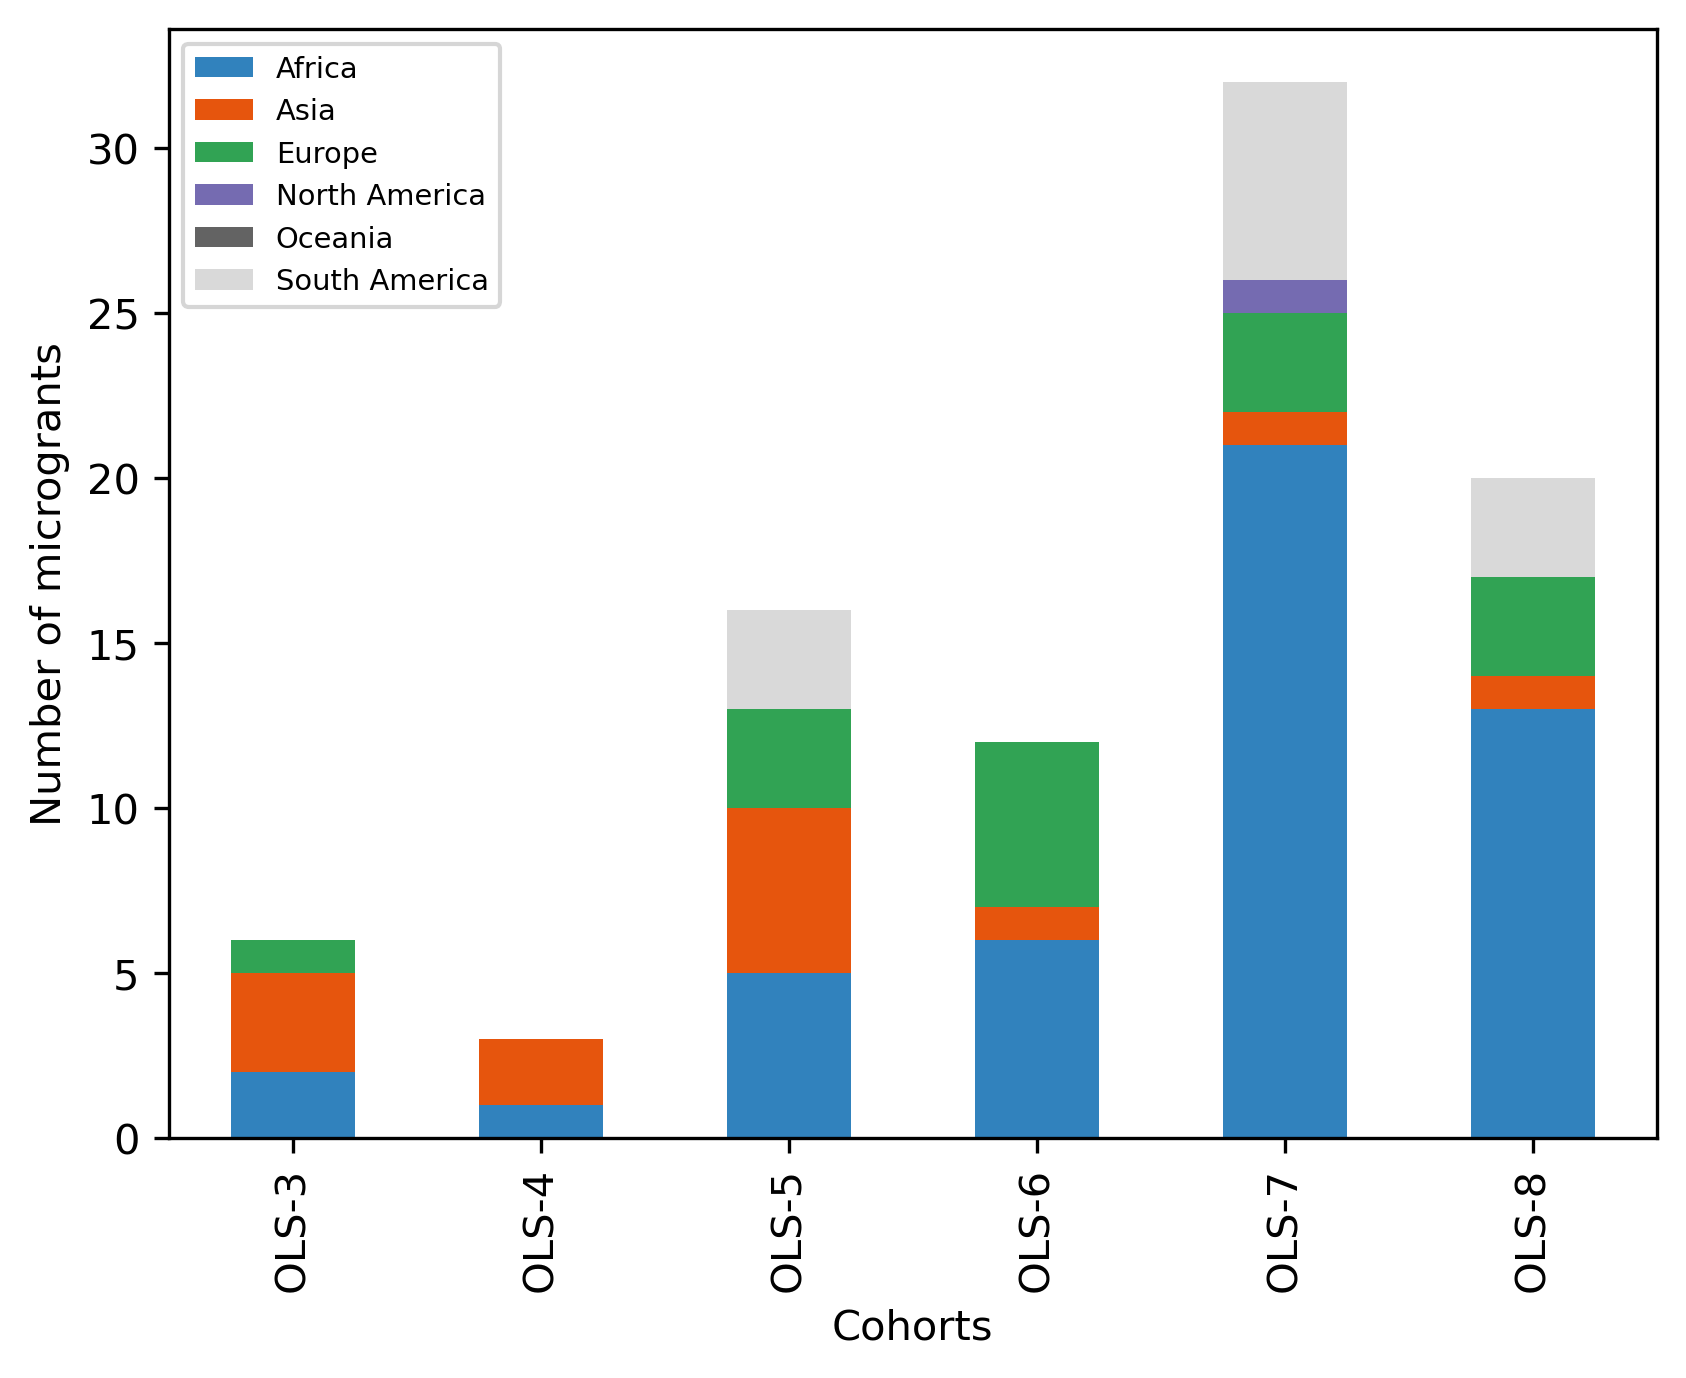

In [7]:
microg_cohort_continent_nb_df = (
    microg_df
    .drop(columns = ["Items", "Country"])
    .groupby(by=["Continent", "Cohort"])
    .count()
)
microg_cohort_continent_nb_df = (
    pd.pivot_table(microg_cohort_continent_nb_df, index = 'Continent', columns = 'Cohort', values="Cost")
    .reindex(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])
)

fig, ax = plt.subplots()
fig.set_dpi(300)
(microg_cohort_continent_nb_df
     .transpose()
     .plot.bar(stacked=True, ax=ax, colormap='tab20c'))
plt.xlabel('Cohorts')
plt.ylabel('Number of microgrants')
ax.legend(fontsize='x-small')

### Amount (GBP) per location

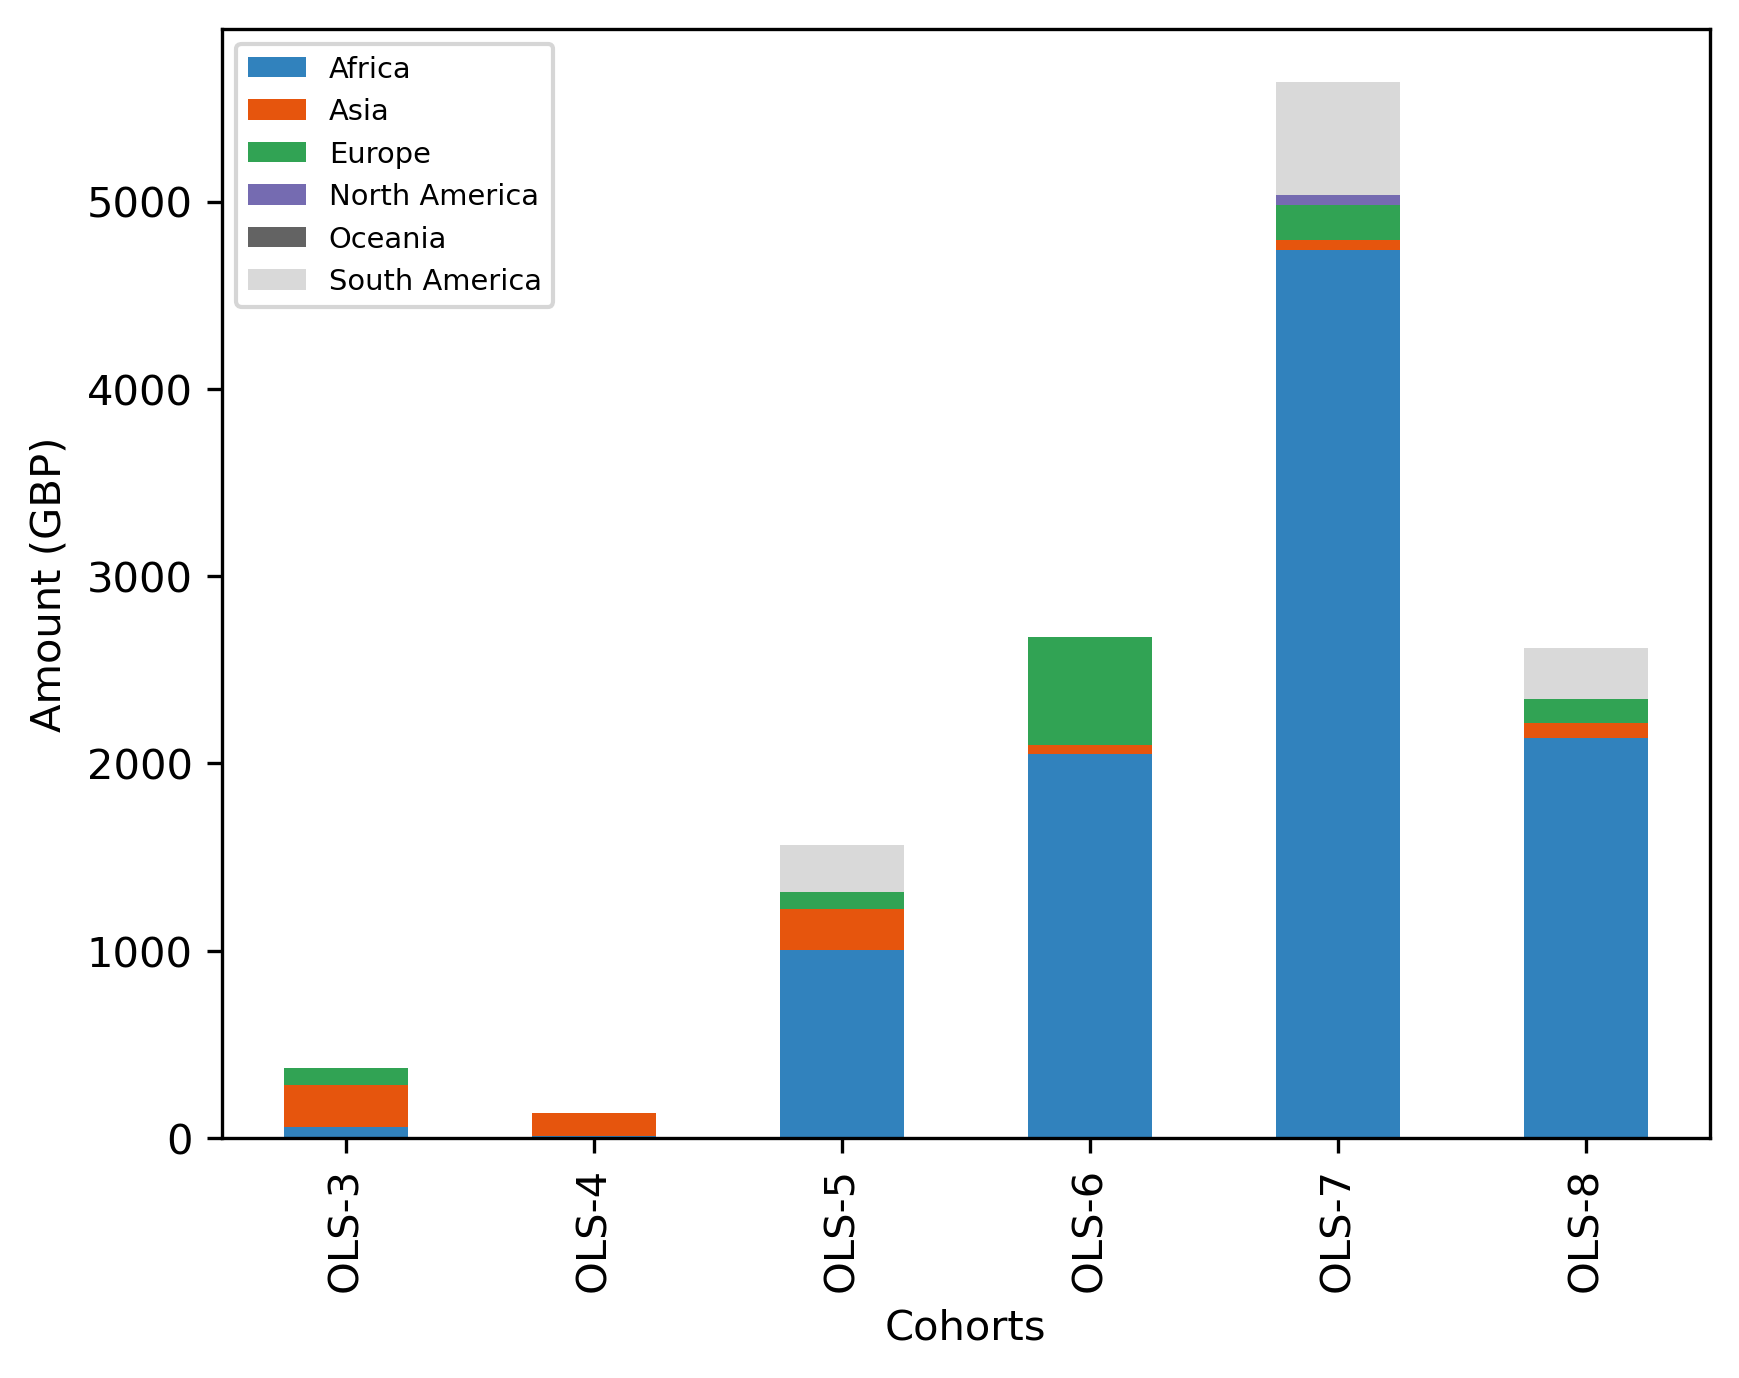

In [8]:
microg_cohort_continent_amount_df = (
    microg_df
    .drop(columns = ["Items", "Country"])
    .groupby(by=["Continent", "Cohort"])
    .sum()
)
microg_cohort_continent_amount_df = (
    pd.pivot_table(microg_cohort_continent_amount_df, index = 'Continent', columns = 'Cohort', values="Cost")
    .reindex(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])
)

fig, ax = plt.subplots()
fig.set_dpi(300)
(microg_cohort_continent_amount_df
     .transpose()
     .plot.bar(stacked=True, ax=ax, colormap='tab20c'))
plt.xlabel('Cohorts')
plt.ylabel('Amount (GBP)')
ax.legend(fontsize='x-small')

### Items

In [9]:
item_df = (
    microg_df
    .drop(columns = ["Continent", "Country", "Cost"])
    .explode("Items")
    .groupby(by="Items")
    .count()
    .rename(columns = {"Cohort": "Number"})
    .sort_values('Number')
)
item_df.sort_values("Number", ascending=False).head(10)

,Number
Items,
Headset,50
Internet,40
Webcam,28
Battery,9
Caring,7
Mouse,6
Modem,5
Other,4
Hardrive,4


## Honoraria

In [10]:
honor_df = (
    pd.read_csv(Path("../data/honorarium.csv") )
    .fillna("")
    .replace("Speaker (Expert talk)", "speaker")
    .replace("speaker for Open Data", "speaker")
    .replace("Speaker", "speaker")
    .replace("Mentor", "mentor")
    .replace("Call Facilitator", "facilitator")
    .replace("Call facilitator", "facilitator")
    .replace("Facilitator (co-hosted 2 meetings and Transcription of the three (3) graduation videos", "facilitator")
    .replace("Transcription of the videos, preparing guideline for the transcription", "facilitator")
    .replace("facilitator role (transcript check - week 2 and 3 cohort calls)", "facilitator")
    .replace("facilitator  (co-host a session )", "facilitator")
    .replace("facilitator (co-host a session)", "facilitator")
    .replace("Facilitator - transcription check", "facilitator")
    .replace("facilitator; transcription check", "facilitator")
    .replace("Video Facilitator", "facilitator")
    .replace("transcription check", "facilitator")
    .replace("Ally Skills workshop facilitator", "facilitator")
    .replace("Facilitator and Speaker", "speaker, facilitator")
    .replace("Mentor and expert", "mentor")
    .replace("co-facilitator, transcriber", "facilitator")
    .replace("Facilitator", "facilitator")
    .assign(
        Continent=lambda df: [get_continent(x) for x in df.Country],
        Rate=lambda df: [rate[x] for x in df.Currency],
        Role=lambda df: df.Role.str.title(),
    )
    .assign(Amount= lambda df: df.Amount * df.Rate)
    .drop(columns = ["Currency", "Rate"])
)

### Amount

Aggregating statistic of microgrant costs

In [11]:
honor_df.Amount.describe()

count    135.00000
mean     264.45292
std      130.78020
min       40.68000
25%      199.18500
50%      203.62000
75%      395.15000
max      772.09080
Name: Amount, dtype: float64

Total amount (in GBP)

In [12]:
sum(honor_df.Amount)

35701.1442

### Cohort and role

Number of honoraria

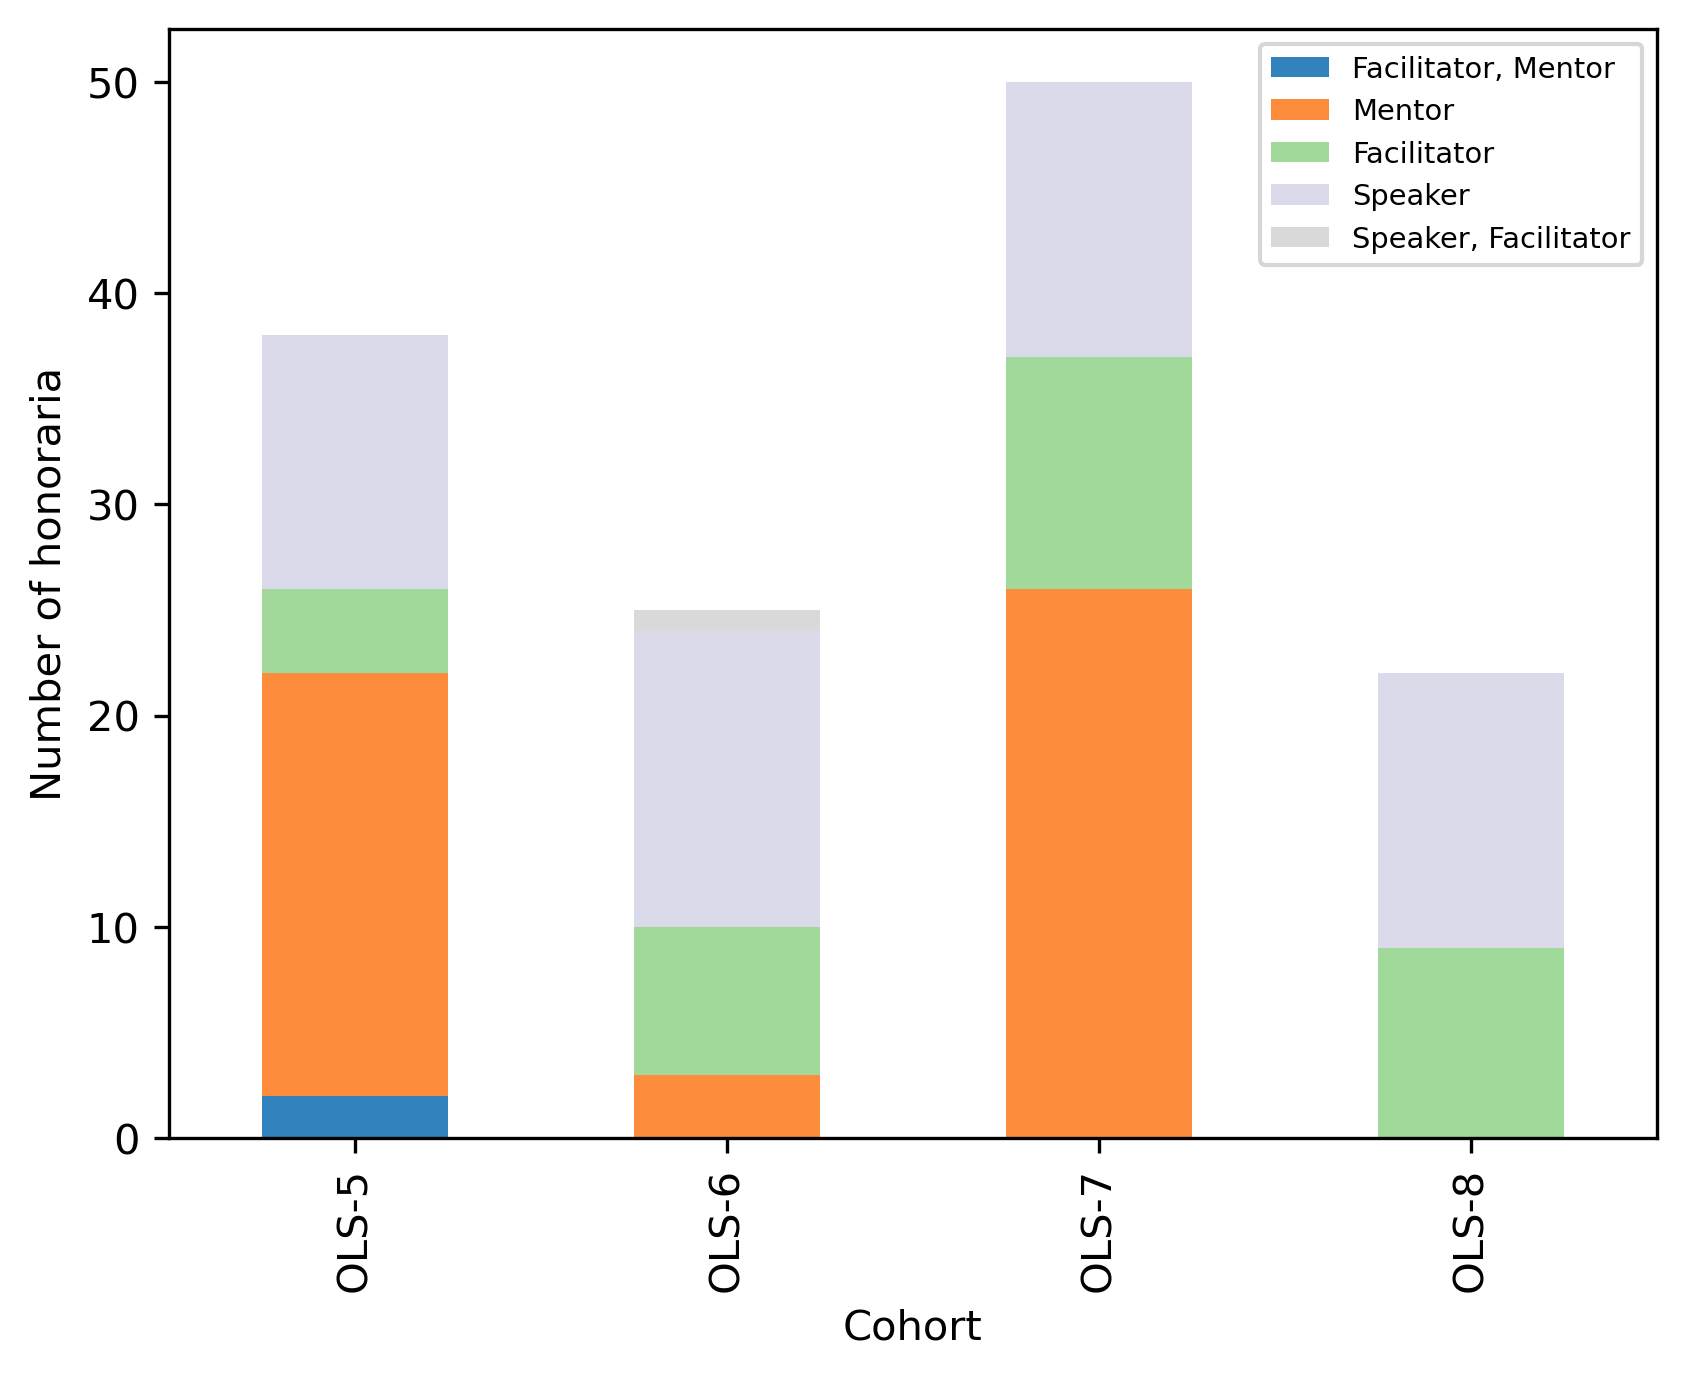

In [13]:
honor_cohort_role_nb_df = (
    honor_df
    .drop(columns = ["Continent", "Country"])
    .groupby(by=["Role","Cohort"])
    .count()
)
honor_cohort_role_nb_df = (
    pd.pivot_table(honor_cohort_role_nb_df, index = 'Role', columns = 'Cohort', values="Amount")
    .reindex(['Facilitator, Mentor', 'Mentor', 'Facilitator', 'Speaker', 'Speaker, Facilitator'])
)

fig, ax = plt.subplots()
fig.set_dpi(300)
(honor_cohort_role_nb_df
     .transpose()
     .plot.bar(stacked=True, ax=ax, colormap='tab20c'))
plt.xlabel("Cohort")
plt.ylabel("Number of honoraria")
ax.legend(fontsize='x-small')

Amount (GBP)

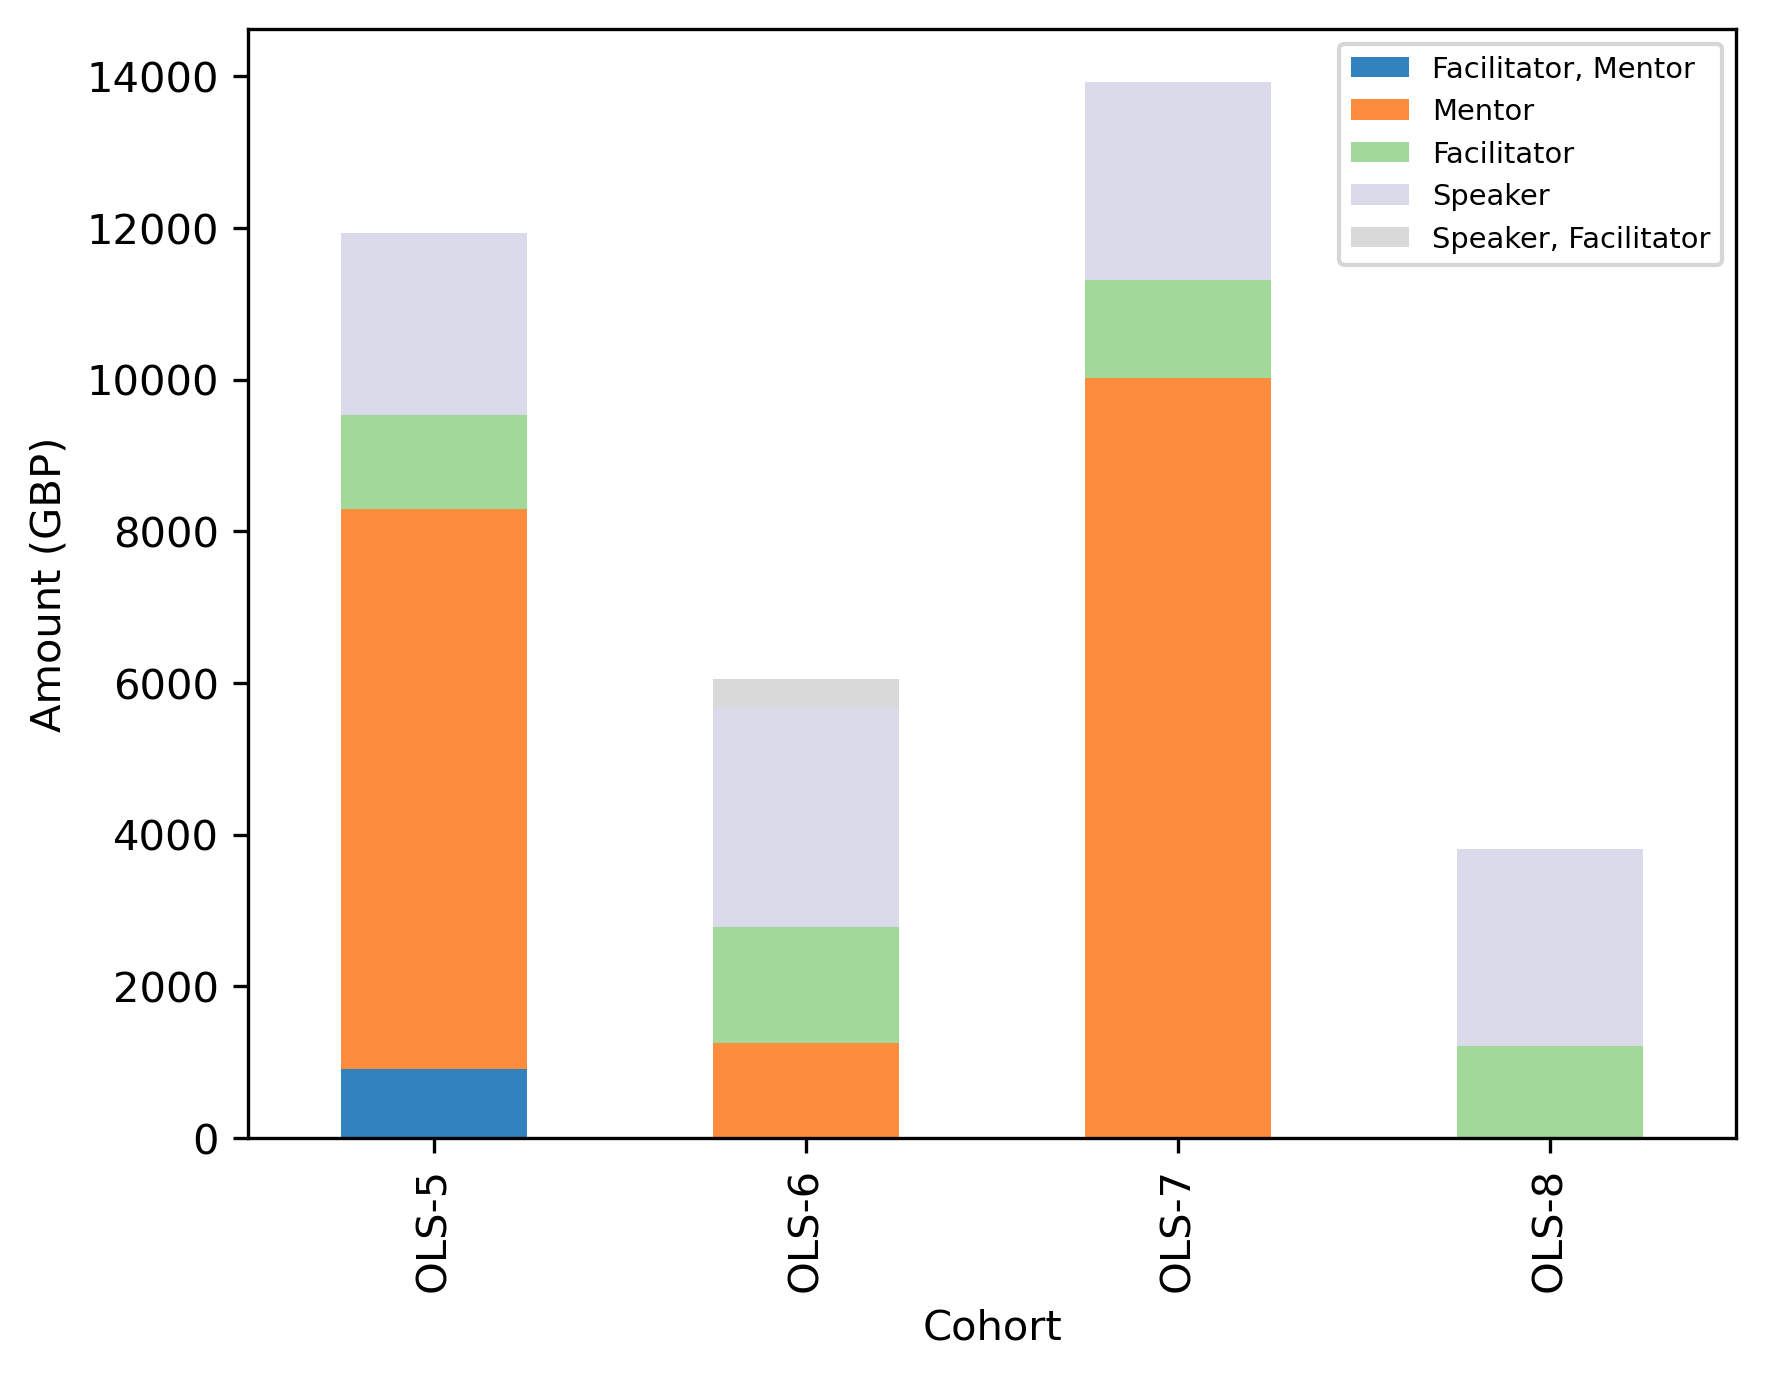

In [14]:
honor_cohort_role_amount_df = (
    honor_df
    .drop(columns = ["Continent", "Country"])
    .groupby(by=["Role","Cohort"])
    .sum()
)
honor_cohort_role_amount_df = (
    pd.pivot_table(honor_cohort_role_amount_df, index = 'Role', columns = 'Cohort', values="Amount")
    .reindex(['Facilitator, Mentor', 'Mentor', 'Facilitator', 'Speaker', 'Speaker, Facilitator'])
)


fig, ax = plt.subplots()
fig.set_dpi(300)
(honor_cohort_role_amount_df
     .transpose()
     .plot.bar(stacked=True, ax=ax, colormap='tab20c'))
plt.xlabel('Cohort')
plt.ylabel('Amount (GBP)')
ax.legend(
#    loc='center left',
#    bbox_to_anchor=(1, 0.5),
#    frameon=False,
    fontsize='x-small')

# Overview figure

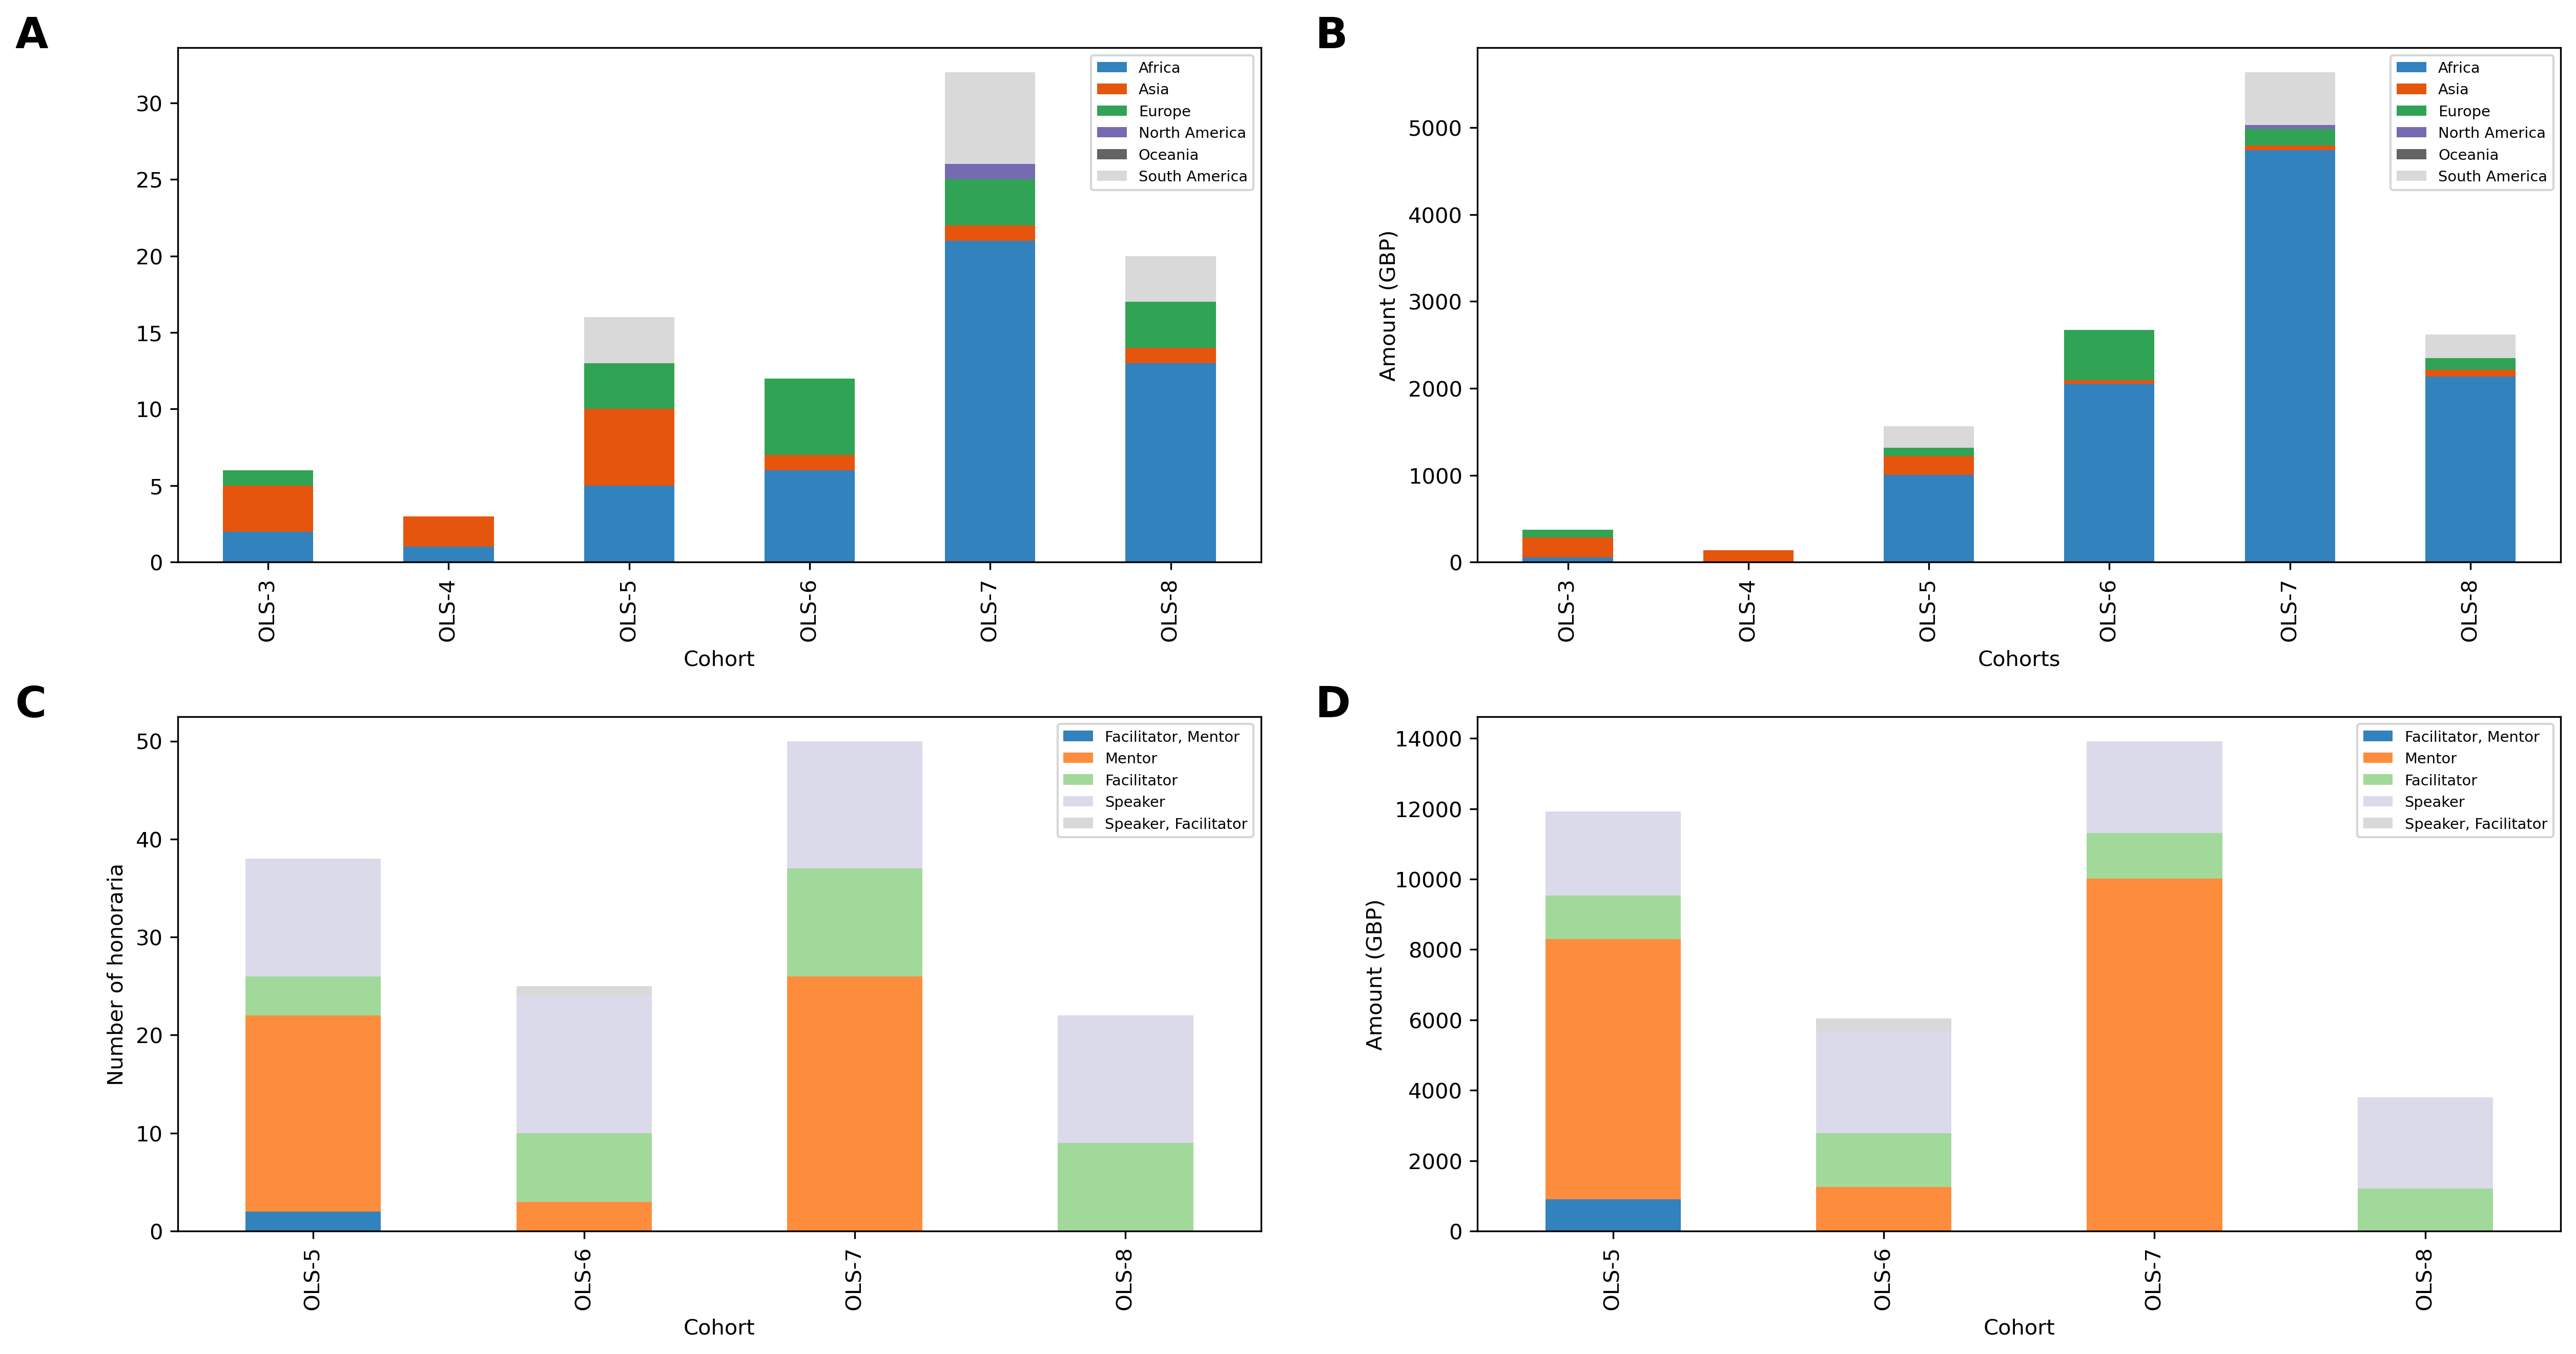

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=2, dpi=300)
fig.subplots_adjust(hspace=0.3)

#gs = fig.add_gridspec(2,2)
ax1 = axs[0, 0]
ax2 = axs[0, 1]#fig.add_subplot(gs[1, :])
ax3 = axs[1, 0]#fig.add_subplot(gs[2, 0])
ax4 = axs[1, 1]#fig.add_subplot(gs[2, 1])

# A
(microg_cohort_continent_nb_df
     .transpose()
     .plot.bar(stacked=True, ax=ax1, colormap="tab20c", figsize=(20, 10)))
plt.xlabel("Cohorts")
plt.ylabel("Number of microgrants")
ax1.legend(fontsize="x-small")
ax1.text(-0.15, 1, "A", transform=ax1.transAxes, size=20, weight='bold')

# B
(microg_cohort_continent_amount_df
     .transpose()
     .plot.bar(stacked=True, ax=ax2, colormap="tab20c", figsize=(20, 10)))
ax2.set_xlabel("Cohorts")
ax2.set_ylabel("Amount (GBP)")
ax2.legend(fontsize="x-small")
ax2.text(-0.15, 1, "B", transform=ax2.transAxes, size=20, weight='bold')

# c
(honor_cohort_role_nb_df
     .transpose()
     .plot.bar(stacked=True, ax=ax3, colormap='tab20c', figsize=(20, 10)))
ax3.set_xlabel("Cohort")
ax3.set_ylabel("Number of honoraria")
ax3.legend(fontsize='x-small')
ax3.text(-0.15, 1, "C", transform=ax3.transAxes, size=20, weight='bold')

# D
(honor_cohort_role_amount_df
     .transpose()
     .plot.bar(stacked=True, ax=ax4, colormap='tab20c', figsize=(20, 10)))
ax4.set_xlabel('Cohort')
ax4.set_ylabel('Amount (GBP)')
ax4.legend(fontsize='x-small')
ax4.text(-0.15, 1, "D", transform=ax4.transAxes, size=20, weight='bold')

#fig.tight_layout()
fig.savefig(Path("../figures/figure-4-microgrant-honoraria.png"), bbox_inches='tight')